# Neural Network based Passengers Prediction of Airlines

### RECURRENT NEURAL NETWORKS (RNN)
### LONG SHORT-TERM MEMORY (LSTM)

### TIME SERIES

In [1]:
# LSTM for International Airline Passengers problem with Regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('E:/RNN-LSTM/AirPassengers.csv')
dataset

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
dataset = dataset['Passengers']
dataset

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64

In [4]:
#Converting Time Series data into Numpy Array
dataset = np.array(dataset).reshape(-1,1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

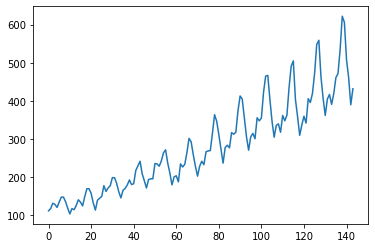

In [5]:
plt.plot(dataset)

Total Data is of 144 Months 

Training Data = 100 Months (0 to 100) 

Testing Data = 44 Months (101 to 144)

In [6]:
#Neural Networks works better if Inputs are in between '0' to '1' 
#MinMaxScaler to get values from '0' to '1'
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [7]:
dataset.min() #Minimum Value

0.0

In [8]:
dataset.max() #Maximum Value

1.0

In [9]:
train_size = 100
test_size = 44

In [10]:
train = dataset[0:train_size, :] #from '0' to 'train_size = 100' , all the Columns
train.shape

(100, 1)

In [11]:
test = dataset[train_size:144, :] #from 'train_size = 144' , all the Columns
test.shape

(44, 1)

### Build TRAINING & TESTING Dataset

In [12]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [14]:
X_train.shape

(98, 1)

In [15]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [16]:
X_test, y_test = get_data(test, look_back)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Build the Model

In [18]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs = 50, batch_size = 1)

Epoch 1/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0402
Epoch 2/50
98/98 [==============================] - 0s 712us/step - loss: 0.0187
Epoch 3/50
98/98 [==============================] - 0s 762us/step - loss: 0.0144
Epoch 4/50
98/98 [==============================] - 0s 889us/step - loss: 0.0131
Epoch 5/50
98/98 [==============================] - 0s 854us/step - loss: 0.0120
Epoch 6/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 7/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 8/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 9/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 10/50
98/98 [==============================] - 0s 818us/step - loss: 0.0064
Epoch 11/50
98/98 [==============================] - 0s 770us/step - loss: 0.0055
Epoch 12/50
98/98 [==============================] - 0s 820us/step - loss: 0.0046
Epoch 13/50
98/98 [================

In [21]:
y_pred = model.predict(X_test)

In [22]:
scaler.scale_

array([0.0019305])

In [23]:
y_pred = scaler.inverse_transform(y_pred)

In [24]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

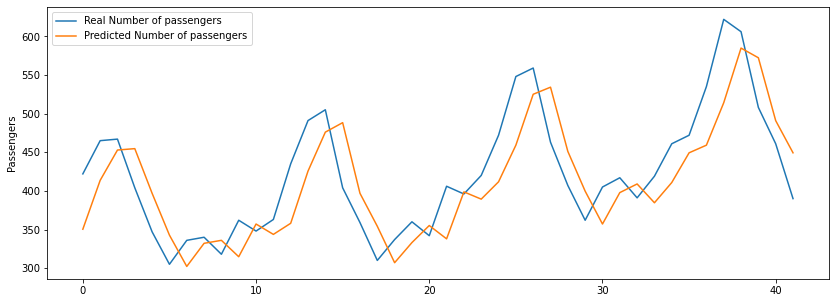

In [25]:
#Plot Baseline & Predictions
plt.figure(figsize = (14,5))
plt.plot(y_test, label = 'Real Number of passengers')
plt.plot(y_pred, label = 'Predicted Number of passengers')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [26]:
scaler.scale_

array([0.0019305])